In [1]:
#import libraries 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer #Vectorizer
from sklearn.model_selection import train_test_split #to get validation dataset

In [ ]:
#load dataframes 
train_df = pd.read_csv("../clean_data/train.csv")
val_df = pd.read_csv("../clean_data/val.csv")

X_train, y_train = train_df["cleaned_synopsis"], train_df["genre"]
X_val, y_val = val_df["cleaned_synopsis"], val_df["genre"]

In [3]:
#vectorize data 
vectorizer = TfidfVectorizer(max_features=100000)
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

In [4]:
#train using logistic regression 
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train_vec, y_train)

y_pred = clf.predict(X_val_vec)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

Validation Accuracy: 0.34925925925925927


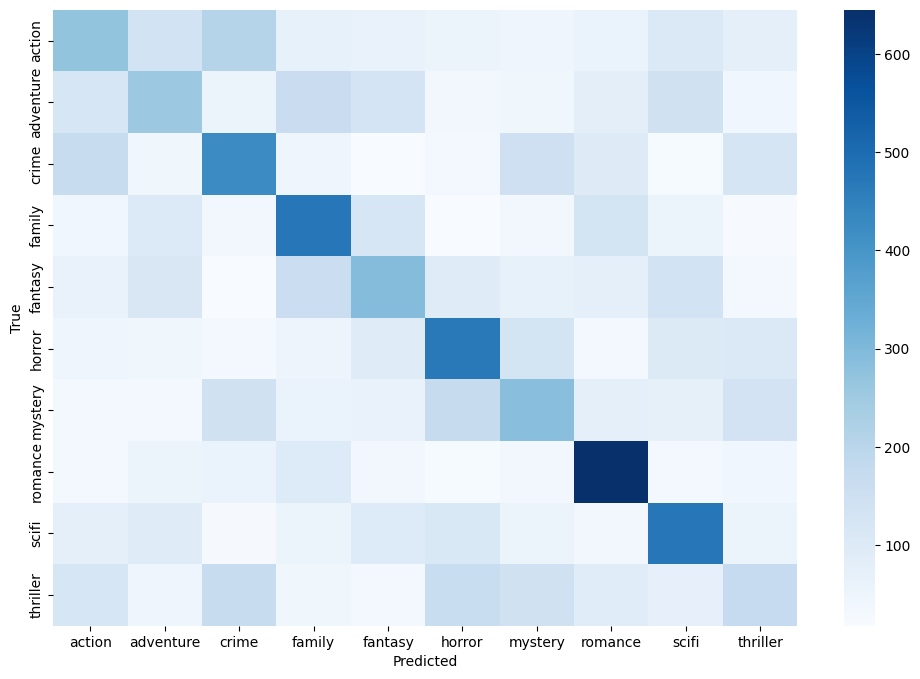

In [5]:
#create confusion matrix
cm = confusion_matrix(y_val, y_pred, labels=clf.classes_)

plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=False, xticklabels=clf.classes_, yticklabels=clf.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Save both model and vectorizer
model_folder = "../models"
os.makedirs(model_folder, exist_ok=True)

vectorizer_folder = "../vectorizer"
os.makedirs(vectorizer_folder, exist_ok=True)

joblib.dump(clf, "../models/genre_model.pkl")
joblib.dump(vectorizer, "../vectorizer/tfidf_vectorizer.pkl")

['vectorizer/tfidf_vectorizer.pkl']

In [ ]:
# Load model + vectorizer
clf = joblib.load("../models/genre_model.pkl")
vectorizer = joblib.load("../vectorizer/tfidf_vectorizer.pkl")

# Test example
#Title: Weapons 
#Genre(s): Horror, Thriller, Mystery, Drama
example = ["When all but one child from the same classroom mysteriously vanish on the same night at exactly the same time, a community is left questioning who or what is behind their disappearance."]

# Transform with fitted vectorizer
example_vec = vectorizer.transform(example)
print("Predicted genre:", clf.predict(example_vec)[0])

Predicted genre: crime
